# OnSports Project

### Module: Unsupervised Learning: Clustering

#### Context
Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of 18.6 billion (USD) in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a $48.6 billion valuation by 2027.

 

#### Objective
OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data of the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

## Importing necessary libraries and data

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# For preprocessing of the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [3]:
#Importing the data
fpl_data = pd.read_csv('fpl_data.csv')

#Creating a copy so that no changes are made to the original dataset
data = fpl_data.copy()

In [4]:
data.shape

(476, 13)

There is information on 476 players and 13 attributes of each player are detailed.

In [5]:
#Displaying the first 10 rows of the data to explore its contents
data.head(10)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2
5,Cedric Soares,Arsenal,Defender,0,1,28,744,11,114.8,110.8,66,3,2
6,Daniel Ceballos,Arsenal,Midfielder,0,4,62,1609,17,422.3,359.8,141,7,6
7,David Luiz,Arsenal,Defender,1,0,41,1396,20,46.7,250.6,144,0,3
8,Edward Nketiah,Arsenal,Forward,2,1,36,411,6,97.3,116.6,211,5,1
9,Emile Smith Rowe,Arsenal,Midfielder,2,5,74,1438,10,385.1,273.2,222,3,9


In [6]:
#Displaying summary info on the data's contents
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


* Player, Club and Position are the only categorical variables. All other columns contain numeric data
* Each row contains key player details.
* At initial glance there does not seem to be any missing data. 
* Player name is not linkely to be included in the unsupervised learning model.

In [7]:
data.duplicated().sum()

0

None of the data seems to be duplicated.

In [8]:
data.isnull().sum()

Player_Name       0
Club              0
Position          0
Goals_Scored      0
Assists           0
Total_Points      0
Minutes           0
Goals_Conceded    0
Creativity        0
Influence         0
Threat            0
Bonus             0
Clean_Sheets      0
dtype: int64

As hypothesized earlier, there seems to be no missing values.

In [9]:
#Presenting a table of summary statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player_Name,476,476,Jacob Murphy,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,476,17,Arsenal,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,476,4,Midfielder,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goals_Scored,476.0,NaN,NaN,NaN,1.907563,3.455562,0.0,0.0,0.5,2.0,23.0
Assists,476.0,NaN,NaN,NaN,1.752101,2.708563,0.0,0.0,0.0,2.0,14.0
Total_Points,476.0,NaN,NaN,NaN,58.516807,51.293559,0.0,10.0,48.0,94.25,244.0
Minutes,476.0,NaN,NaN,NaN,1336.909664,1073.773995,0.0,268.75,1269.5,2256.25,3420.0
Goals_Conceded,476.0,NaN,NaN,NaN,19.157563,15.946171,0.0,4.0,18.0,31.0,68.0
Creativity,476.0,NaN,NaN,NaN,195.97605,251.478541,0.0,8.3,96.95,296.95,1414.9
Influence,476.0,NaN,NaN,NaN,294.617647,267.779681,0.0,46.5,233.1,499.5,1318.2


From what can be deduced from the quantile values of each of the numeric columns, the data is right heavily left skewed. That is, a majority of the players have values on the lower end of the range for that particular attribute; however, there are some exceptional players that score values on the higher end of the range (>75% quantile). We may need to normalize the data before a model if fitted to it. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [10]:
#Presenting a table of summary statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player_Name,476,476,Jacob Murphy,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,476,17,Arsenal,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,476,4,Midfielder,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goals_Scored,476.0,NaN,NaN,NaN,1.907563,3.455562,0.0,0.0,0.5,2.0,23.0
Assists,476.0,NaN,NaN,NaN,1.752101,2.708563,0.0,0.0,0.0,2.0,14.0
Total_Points,476.0,NaN,NaN,NaN,58.516807,51.293559,0.0,10.0,48.0,94.25,244.0
Minutes,476.0,NaN,NaN,NaN,1336.909664,1073.773995,0.0,268.75,1269.5,2256.25,3420.0
Goals_Conceded,476.0,NaN,NaN,NaN,19.157563,15.946171,0.0,4.0,18.0,31.0,68.0
Creativity,476.0,NaN,NaN,NaN,195.97605,251.478541,0.0,8.3,96.95,296.95,1414.9
Influence,476.0,NaN,NaN,NaN,294.617647,267.779681,0.0,46.5,233.1,499.5,1318.2


* The players sampled come from 17 different clubs, with the highest number of players coming from Crystal Palace (30 of the 476).
* Players can have 4 different positions. Just over 25% of all the players are midfielders. 
* Players score on average 1-2 goals, but at least one player scored 23 goals.
* Players have a similar range for assists, max assists is 14.
* Based on the quartiles, there seems to be significant differences between the performance of different players.

In [11]:
#Displaying the different values for categorical data
cat_cols_exc_name = ['Club','Position']
for col in cat_cols_exc_name:
    print(data[col].value_counts())
    print('*'*42)

# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(feature, data=data,figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Arsenal                     30
Crystal Palace              30
Newcastle United            29
Tottenham Hotspurs          29
Leicester City              29
Leeds United                29
West Ham United             29
Chelsea                     28
Manchester United           28
Brighton and Hove Albion    28
Burnley                     27
Everton                     27
Liverpool                   27
Southampton                 27
Manchester City             27
Wolverhampton Wanderers     26
Aston Villa                 26
Name: Club, dtype: int64
******************************************
Midfielder    195
Defender      172
Forward        64
Goalkeeper     45
Name: Position, dtype: int64
******************************************


In [12]:
# function to create labeled barplots
def labeled_barplot(feature,data = data, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

**`Goals Scored`**

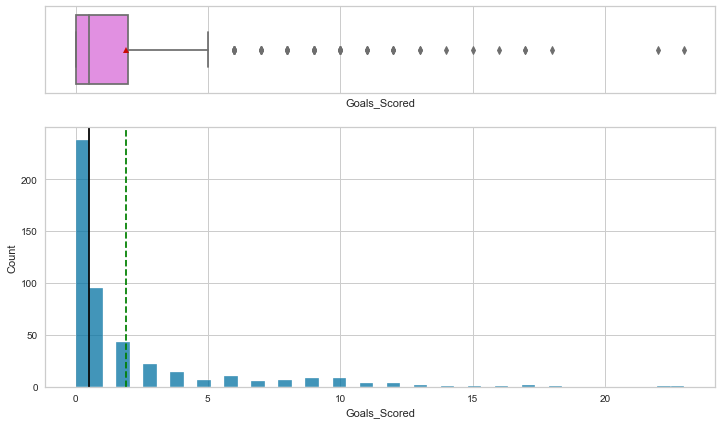

In [13]:
histogram_boxplot('Goals_Scored')

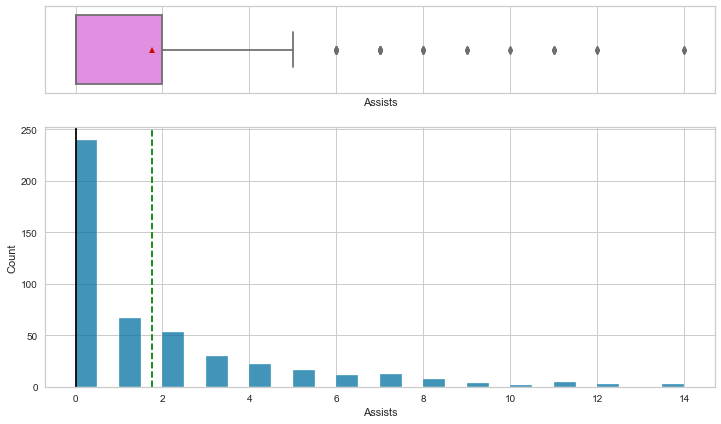

In [14]:
histogram_boxplot('Assists')

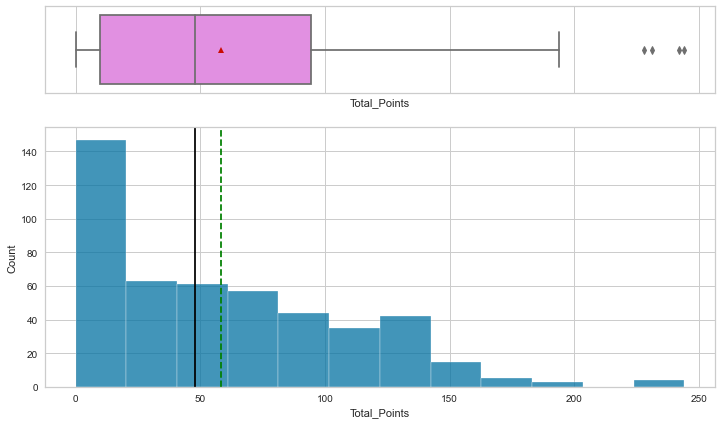

In [16]:
histogram_boxplot('Total_Points')

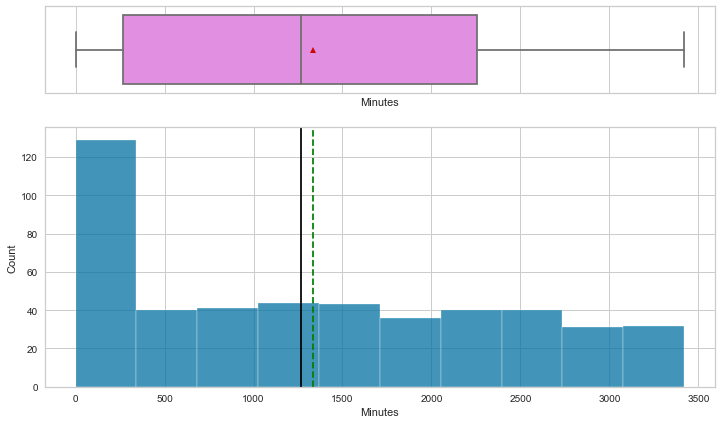

In [17]:
histogram_boxplot('Minutes')

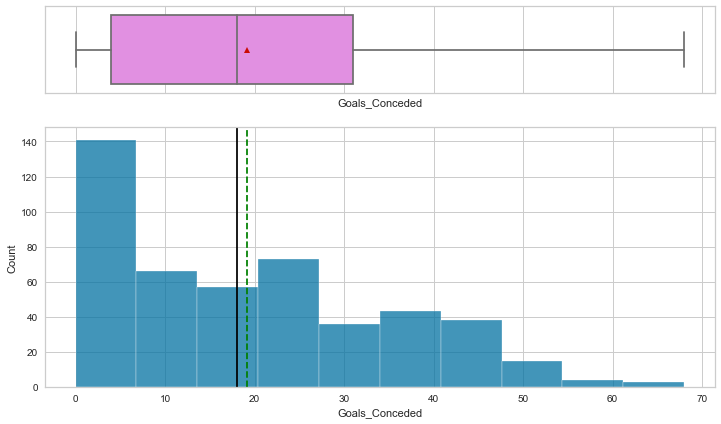

In [18]:
histogram_boxplot('Goals_Conceded')

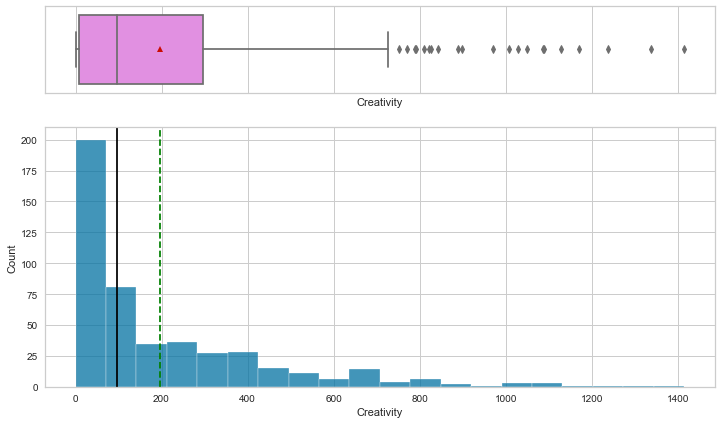

In [19]:
histogram_boxplot('Creativity')

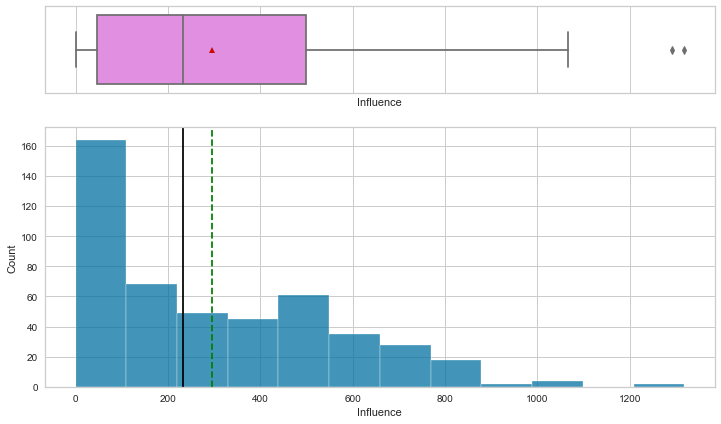

In [20]:
histogram_boxplot('Influence')

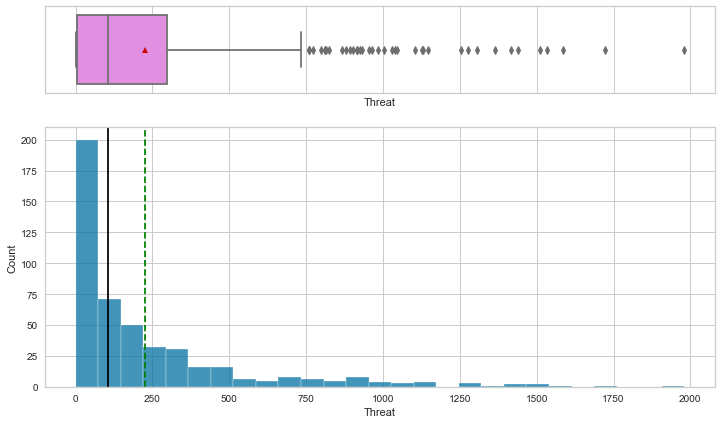

In [21]:
histogram_boxplot('Threat')

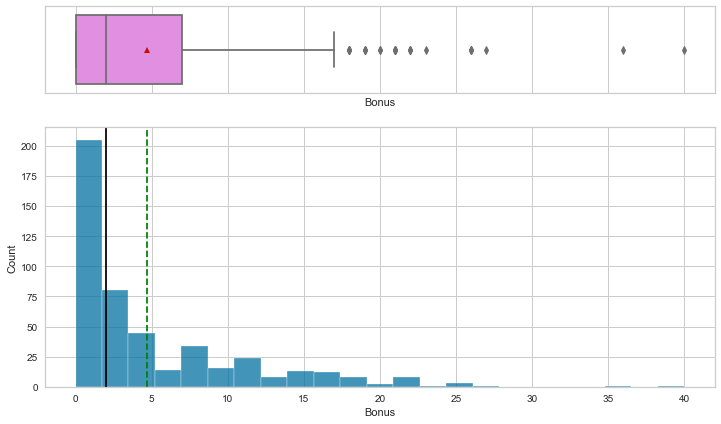

In [22]:
histogram_boxplot('Bonus')

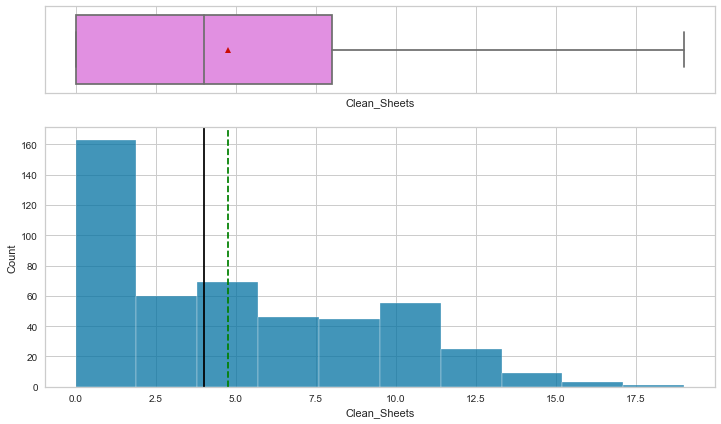

In [23]:
histogram_boxplot('Clean_Sheets')

* There is definate right skewedness in all numeric attributes.

### Bivariate Analysis
**Questions**:

1. What does the distribution of total fantasy points scored by players look like?
2. Players from which team have scored the most fantasy points on average?
3. Players in different positions have specific roles to play in a team. How does the average fantasy points differ across positions?
4. To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. How does the total number of minutes played, on average, vary across different positions?
5. Every point counts in fantasy sports and getting bonus points for a player is always a treat. Which team's players have secured the most bonus points on average?

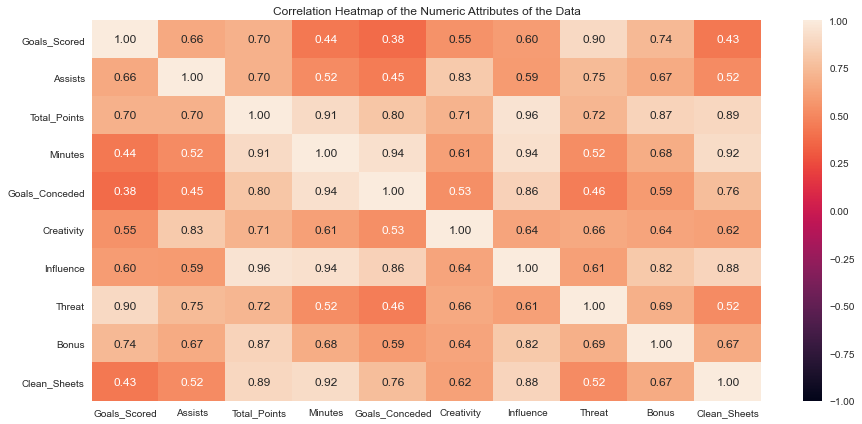

In [24]:
#Correlation Heatmap to see how attributes are related to one another
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of the Numeric Attributes of the Data')
plt.show()

* We can see that all attributes seems to be highly pairwise positively correlated with each other. It could be that the better a player is in these attributes the better they are overall in a game.
* Influence and Total Points have the highest correlation coefficient of 0.96.
* Minutes and Goals Conceded have the second highest correlation.
* Goals Conceded and Goals Scored have the lowest correlation.

**Lets identify how the total_points are distributed among the players.**
1. What does the distribution of total points by players look like?

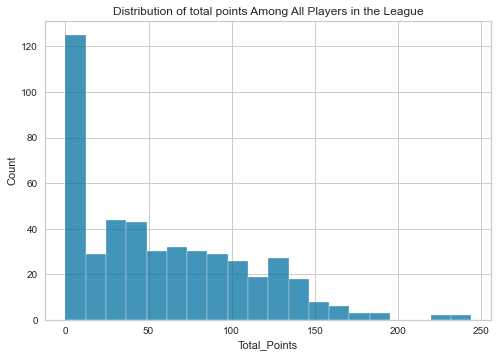

In [28]:
sns.histplot(data=data,x='Total_Points', bins=20)
plt.title('Distribution of total points Among All Players in the League')
plt.show()

This shows that the distribution of points is right skewed. Just over 120 players have 0-10 points in the league. This is the most populated bin. There are a few players that have >150 points. 

Since there are so many players, we can focus on those that have the most points and the least points in the league.

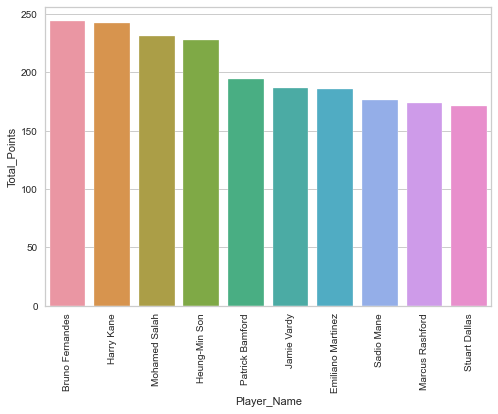

In [30]:
sns.barplot(data=data.sort_values(by='Total_Points',ascending=False,ignore_index=True).iloc[:10], x='Player_Name',y='Total_Points')
plt.xticks(rotation=90)
plt.title('')
plt.show()

In [37]:
data[data['Total_Points']==0]['Player_Name']

16                    Matt Macey
17                  Miguel Azeez
26     Sokratis Papastathopoulos
28                William Saliba
38                Henri Lansbury
43        Jose Peleteiro Romallo
52                  Orjan Nyland
68                  Jason Steele
84      Anthony Driscoll-Glennon
120             Faustino Anjorin
121                Fikayo Tomori
125                  Karlo Ziger
137         Valentino Livramento
142               Connor Wickham
158              Nathan Ferguson
161                 Reece Hannam
162                  Ryan Inniss
163                    Sam Woods
165            Stephen Henderson
196                 Adam Forshaw
205                 Jack Jenkins
207                 Jay-Roy Grot
208               Jordan Stevens
210                 Kamil Miazek
214               Mateusz Bogusz
232               Filip Benkovic
249        Vontae Daley-Campbell
295                   Luke Mbete
297             Nicolas Otamendi
306        Taylor Harwood-Bellis
328       

* Approximately 46 players have no points in the league.
* The highest number of points is earned by Bruno Fernandes who earned 244 points.
* The top ten players had more than 150 points

**Looking at the distribution of points across the 30 teams**

2. Players from which team have scored the most fantasy points on average?

In [44]:
#Grouping the data by club and calculating the total average points earned by players from each club
data.groupby(by='Club')['Total_Points'].mean().sort_values(ascending=False)

Club
Manchester City             78.666667
Chelsea                     67.142857
Liverpool                   66.851852
Aston Villa                 65.615385
Manchester United           63.214286
Tottenham Hotspurs          60.689655
Everton                     58.629630
Leeds United                58.310345
West Ham United             58.137931
Leicester City              57.896552
Wolverhampton Wanderers     55.423077
Arsenal                     54.400000
Southampton                 54.259259
Brighton and Hove Albion    53.464286
Burnley                     52.925926
Crystal Palace              45.966667
Newcastle United            45.758621
Name: Total_Points, dtype: float64

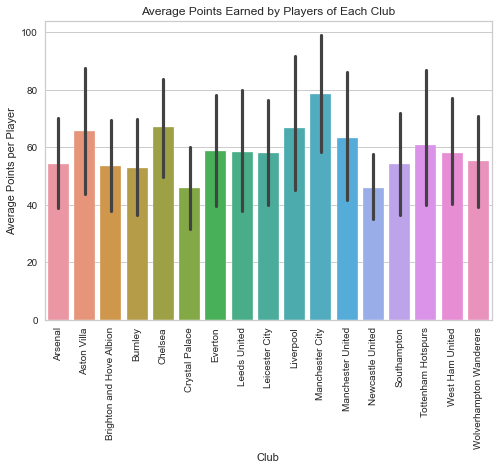

In [41]:
#Graphing the average points earned by players in each club and displaying
#the graph in descending order by average
sns.barplot(data=data, x='Club',y='Total_Points')
plt.xticks(rotation=90)
plt.ylabel('Average Points per Player')
plt.title('Average Points Earned by Players of Each Club')
plt.show()

* Manchester City players earn the most amount of points on average (mean), a decent amount above every other team. On average, a player from Manchester United will earn around 11 points more than a player fromt he next best team.
* The next best team, based on the average points per player is Chelsea. However, players from Chelsea earn less than a point more than the next best team, Liverpool. This indicates a large amount of separation in the distribution of points between Manchester City and the rest of the teams. 
* Newcastle United players tend to earn the least points of 45.8. 


* There is a wide distribution of points in each club which may be due to some clubs having 'superstar players' - players that have a high number of points, significantly higher than the rest of the field like Bruno Fernandes along with players that earn no points.  There may be other reasons for the distribution of points among teams that will be explroed later. 

**Players in different positions have specific roles to play in a team. How does the average fantasy points differ across positions?**

In [45]:
#Grouping the data by Position and calculating the average scores for each position
data.groupby(by='Position').agg(np.average)['Total_Points'].sort_values(ascending=False)

Position
Midfielder    62.953846
Forward       60.812500
Goalkeeper    55.133333
Defender      53.517442
Name: Total_Points, dtype: float64

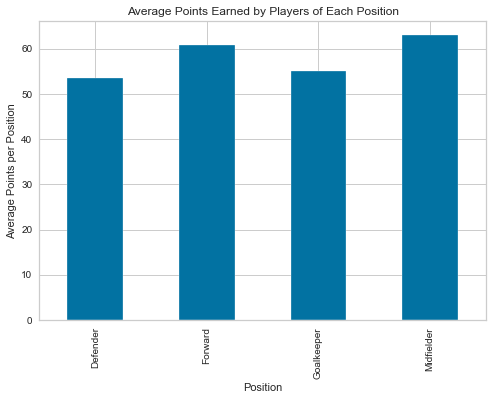

In [46]:
data.groupby(by='Position').agg(np.average)['Total_Points'].plot(kind='bar', rot=90, 
                     ylabel = 'Average Points per Position', 
                     title ='Average Points Earned by Players of Each Position')
plt.show()

* The distribution of points across the 4 positions is not very wide, range of <10 points.

* Midfielders tend to earn the most points at almost 63 on average per player, while Defenders earn the least amount on average at 53.5 per player.

**To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. How does the total number of minutes played, on average, vary across different positions?**

In [47]:
#Grouping the Data by Position and Calcualting the average amount of time, in minutes, that
#each position spends on the field
data.groupby(by='Position').agg(np.average)['Minutes'].sort_values(ascending=False)

Position
Midfielder    1401.738462
Defender      1367.453488
Goalkeeper    1291.911111
Forward       1088.937500
Name: Minutes, dtype: float64

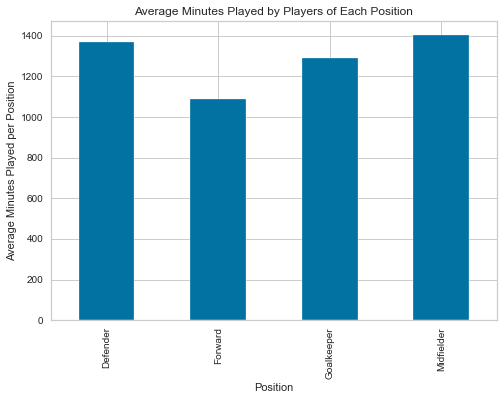

In [48]:
data.groupby(by='Position').agg(np.average)['Minutes'].plot(kind='bar', rot=90, 
                      ylabel = 'Average Minutes Played per Position', title ='Average Minutes Played by Players of Each Position');

* Midfielders on average are on the field the longest while forwards tend to be rotated out more often and play the least amount of time.

**Every point counts in fantasy sports and getting bonus points for a player is always a treat. Which team's players have secured the most bonus points on average?**

In [49]:
data.groupby(by='Club').agg(np.average)['Bonus'].sort_values(ascending=False)

Club
Manchester City             7.333333
Chelsea                     5.642857
Manchester United           5.357143
Liverpool                   5.185185
Aston Villa                 5.038462
Leicester City              4.965517
Tottenham Hotspurs          4.896552
Everton                     4.888889
West Ham United             4.655172
Arsenal                     4.600000
Leeds United                4.517241
Wolverhampton Wanderers     4.384615
Southampton                 4.111111
Brighton and Hove Albion    4.071429
Burnley                     3.777778
Crystal Palace              3.700000
Newcastle United            3.275862
Name: Bonus, dtype: float64

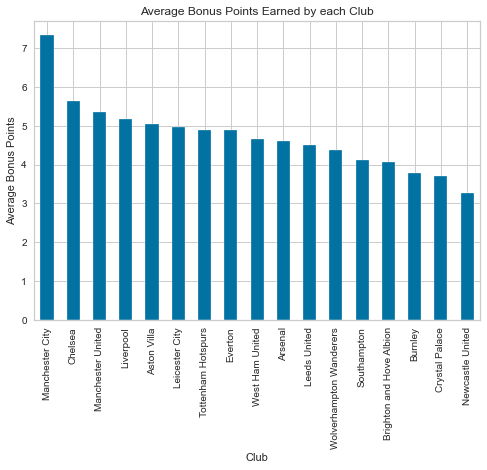

In [51]:
data.groupby(by='Club').agg(np.average)['Bonus'].sort_values(ascending=False).plot(kind='bar',rot = 90, ylabel='Average Bonus Points',
               title = 'Average Bonus Points Earned by each Club');

* Manchester City Earns the Highest Number of Bonus Points, on average 7.33 points per player (1.8 points more than the next best team Chelsea.
* As with the distribution in Total Points, after the highest ranked team, there is a noticable drop off difference in the bonus points distribution among the rest of the teams.
* Newcastle United earns the lowest average bonus points per player of 3.28. 

* The distribution of bonus points among the teams is very similar to the distribution of total points among the teams, the order is close if not the same. 

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

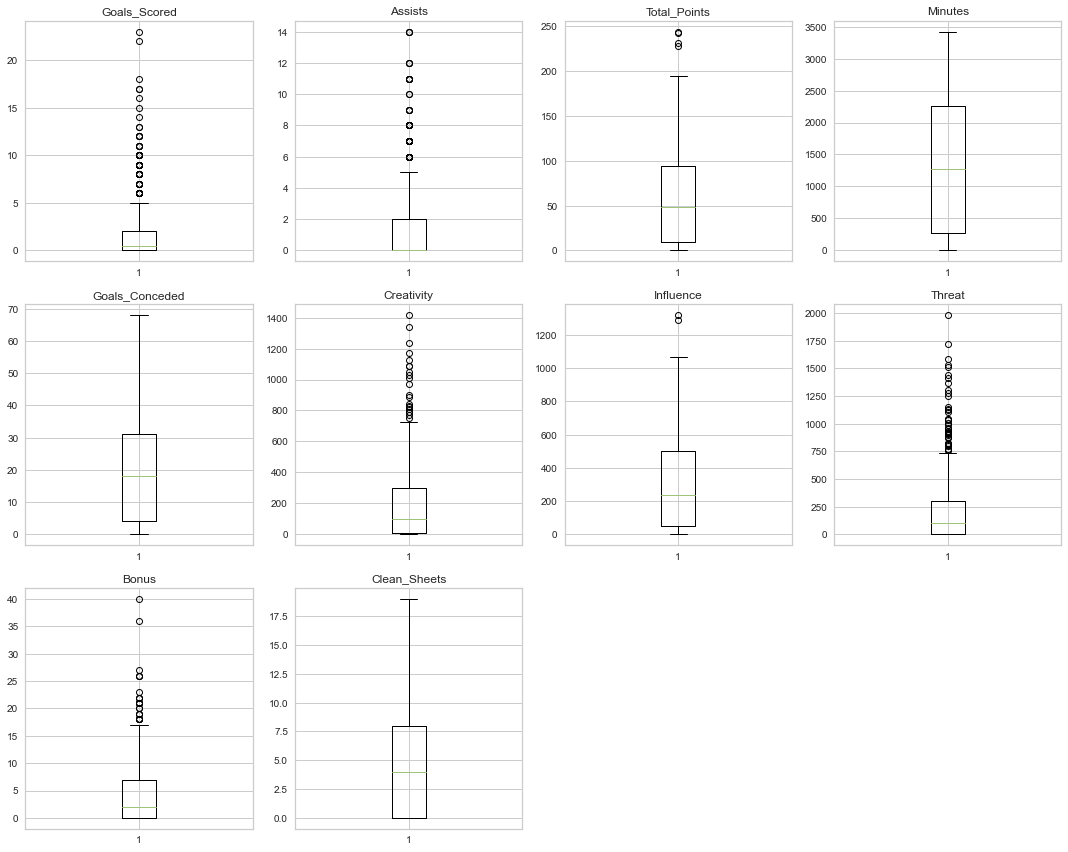

In [53]:
#Checking for outliers in the numeric columns
#Outliers here are defined as values more than 1.5*IQR + Q3
plt.figure(figsize=(15, 12))

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Dummy Variables

In [54]:
#Creating dummy variables for the categorical data
cat_cols = data[cat_cols_exc_name]
dummy_cols = pd.get_dummies(cat_cols)
dummy_cols.head()

,Club_Arsenal,Club_Aston Villa,Club_Brighton and Hove Albion,Club_Burnley,Club_Chelsea,Club_Crystal Palace,Club_Everton,Club_Leeds United,Club_Leicester City,Club_Liverpool,Club_Manchester City,Club_Manchester United,Club_Newcastle United,Club_Southampton,Club_Tottenham Hotspurs,Club_West Ham United,Club_Wolverhampton Wanderers,Position_Defender,Position_Forward,Position_Goalkeeper,Position_Midfielder
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Scaling
We will scale the data before we proceed so that all data fall within a similar range.

In [55]:
#Scaling the data so that it becomes more normally distrbuted
scaler = StandardScaler()
subset = data[numeric_columns].copy()
numeric_scaled = scaler.fit_transform(subset)

In [56]:
#Creating a data frame with the scaled data
numeric_df = pd.DataFrame(numeric_scaled, columns = subset.columns)
numeric_df

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510
...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [57]:
#Exploring the scaled_df to see if it is consistent with the original
numeric_df.shape

(476, 10)

In [58]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Goals_Scored    476 non-null    float64
 1   Assists         476 non-null    float64
 2   Total_Points    476 non-null    float64
 3   Minutes         476 non-null    float64
 4   Goals_Conceded  476 non-null    float64
 5   Creativity      476 non-null    float64
 6   Influence       476 non-null    float64
 7   Threat          476 non-null    float64
 8   Bonus           476 non-null    float64
 9   Clean_Sheets    476 non-null    float64
dtypes: float64(10)
memory usage: 37.3 KB


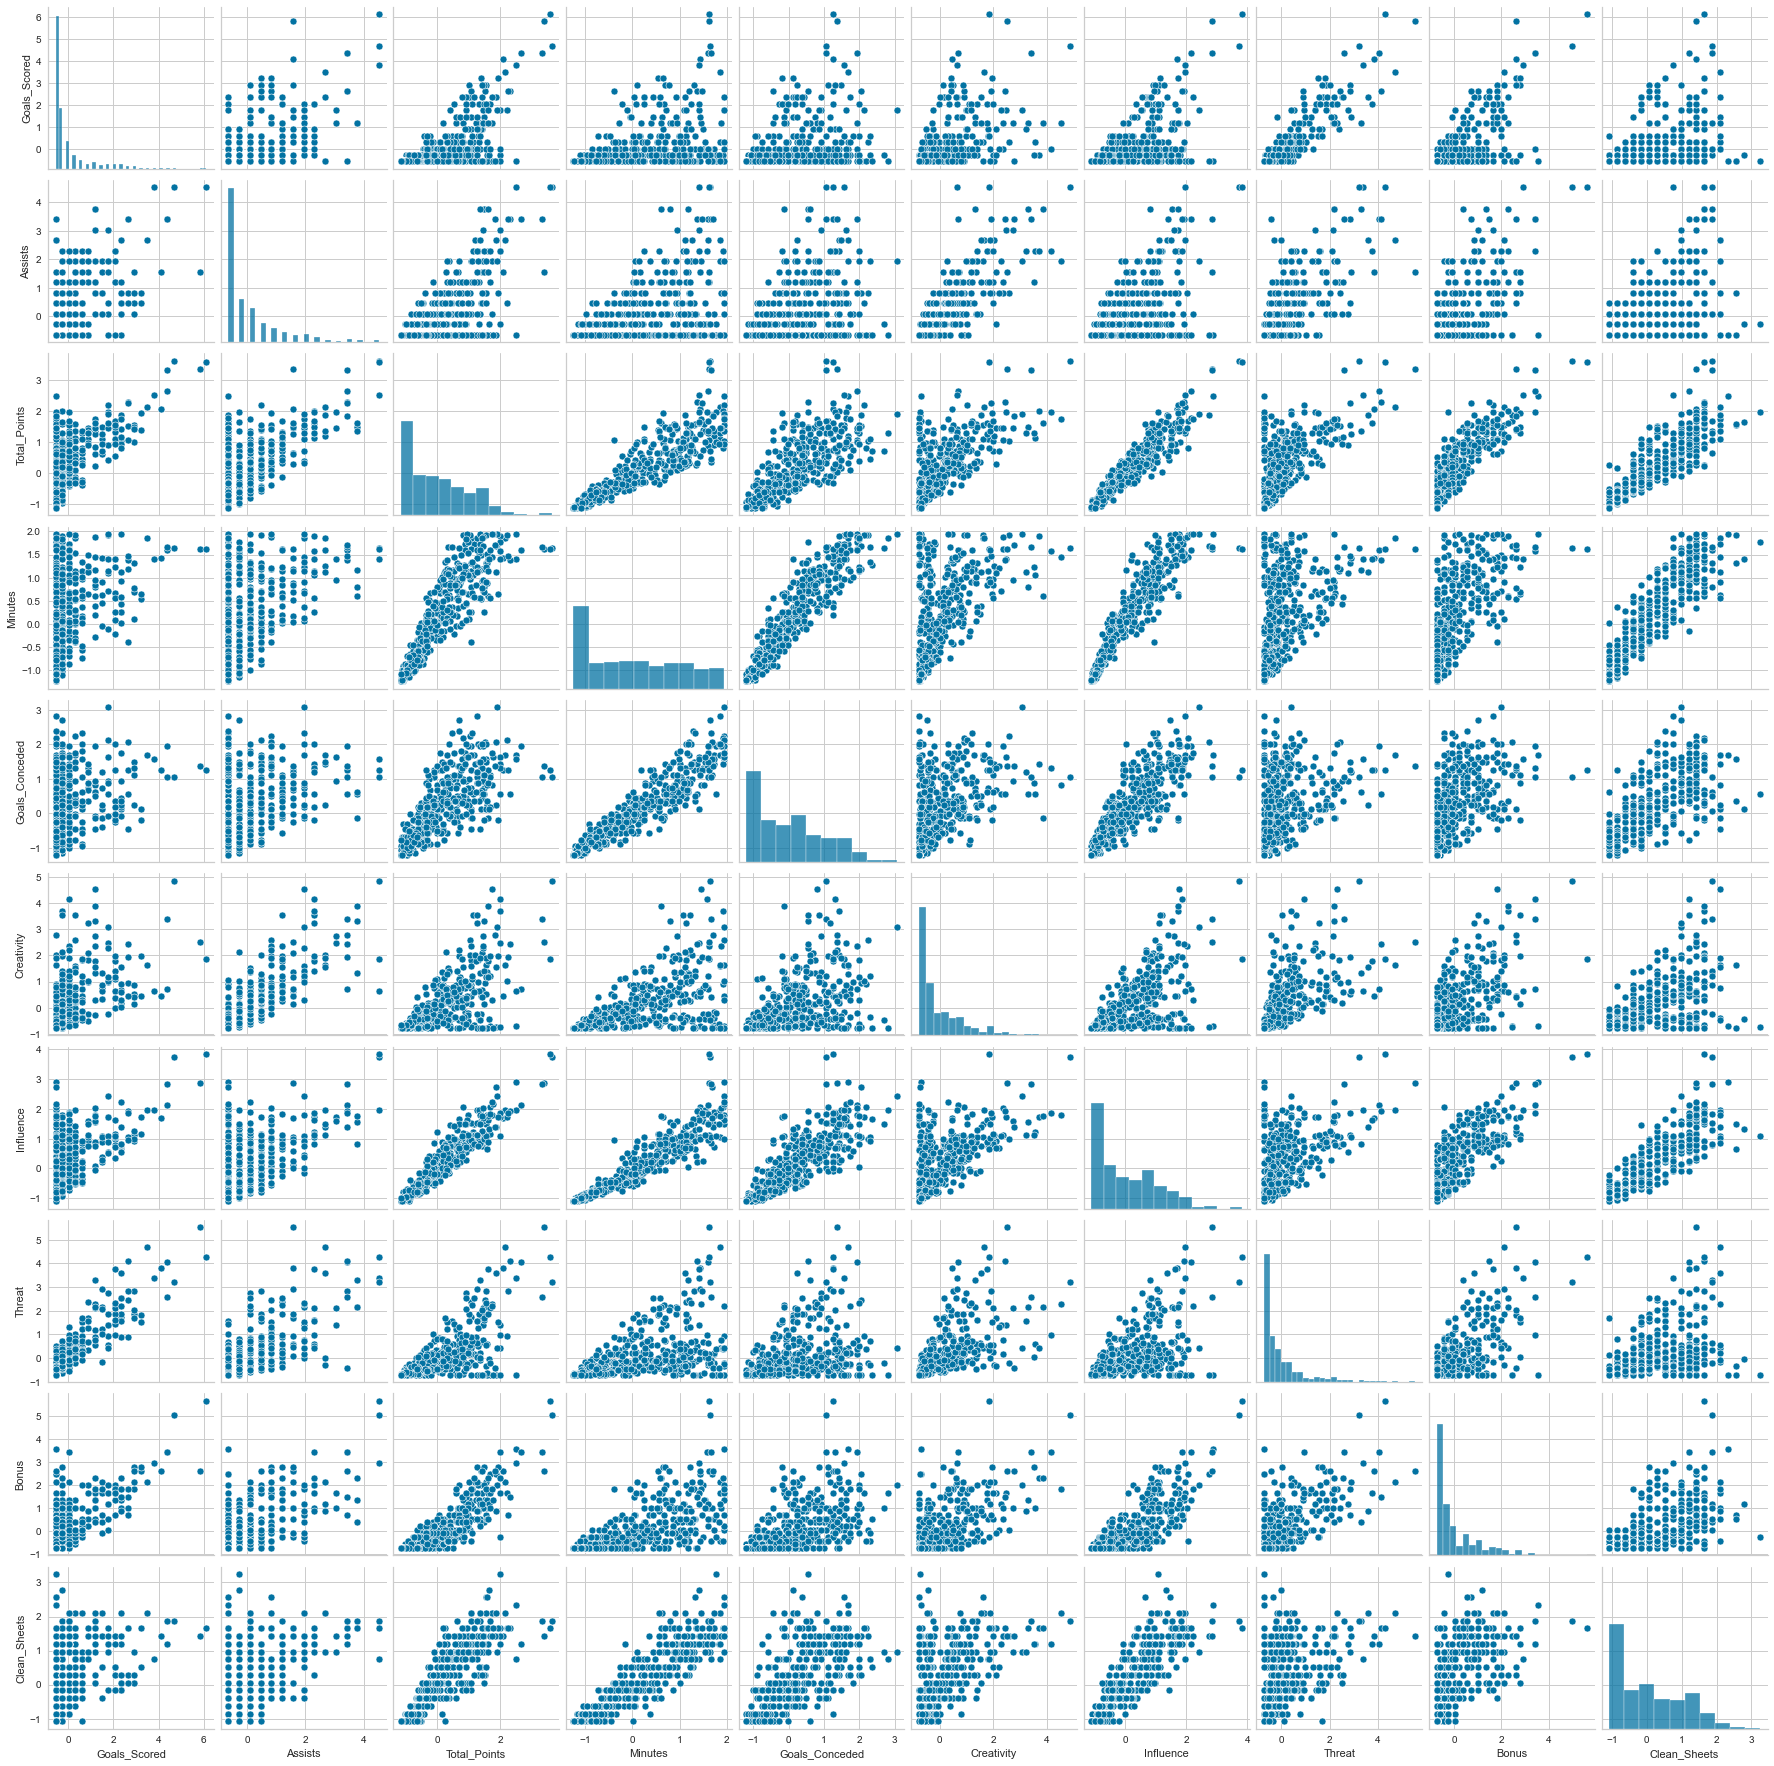

In [59]:
#Creating a pairplot of the scaled data
sns.pairplot(numeric_df);

## K-means Clustering

The categorical data other than player name, club and position, should not affect the overall performance of a player and thus would only be correlates in the data and not necessarily causes, distoring the results of the cluster. Therefore, the clustering will be perfomed only on the numeric data. The clusters will then be compared with the categories to determine if it is a correlate. 

Number of Clusters: 1 	Average Distortion: 2.773037110097803
Number of Clusters: 2 	Average Distortion: 1.863573678589827
Number of Clusters: 3 	Average Distortion: 1.5612774038101604
Number of Clusters: 4 	Average Distortion: 1.3542782238901416
Number of Clusters: 5 	Average Distortion: 1.2931541699741689
Number of Clusters: 6 	Average Distortion: 1.225849543585495
Number of Clusters: 7 	Average Distortion: 1.16048401421345
Number of Clusters: 8 	Average Distortion: 1.109804758457438
Number of Clusters: 9 	Average Distortion: 1.0797310475776052
Number of Clusters: 10 	Average Distortion: 1.017436992641063
Number of Clusters: 11 	Average Distortion: 1.020874702026782
Number of Clusters: 12 	Average Distortion: 0.9850734409030882
Number of Clusters: 13 	Average Distortion: 0.9602766985773118
Number of Clusters: 14 	Average Distortion: 0.9413187781558084


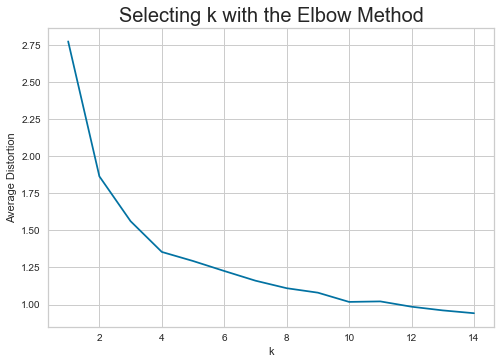

In [65]:
#Clustering only on the numeric columns
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit_predict(numeric_df)
    prediction = model.predict(numeric_df)
    distortion = (
        sum(np.min(cdist(numeric_df, model.cluster_centers_, "euclidean"), axis=1))
        / numeric_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

* There seems to be a knick in the elbow method at k=2, 3 and 4.

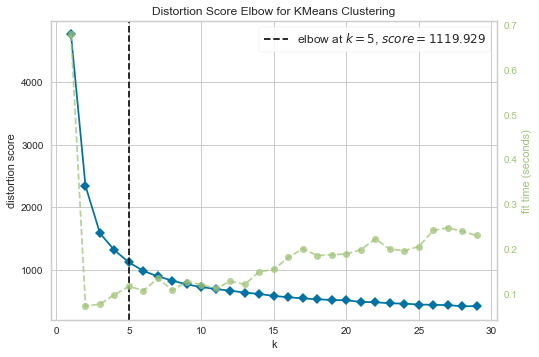

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 30), timings=True)
visualizer.fit(numeric_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

For n_clusters = 2, the silhouette score is 0.4846029912769078)
For n_clusters = 3, the silhouette score is 0.4657385712264916)
For n_clusters = 4, the silhouette score is 0.40413213643851864)
For n_clusters = 5, the silhouette score is 0.4106388194369885)
For n_clusters = 6, the silhouette score is 0.4146361053554877)
For n_clusters = 7, the silhouette score is 0.38269083243169777)
For n_clusters = 8, the silhouette score is 0.3750329965069649)
For n_clusters = 9, the silhouette score is 0.37636724511254555)
For n_clusters = 10, the silhouette score is 0.33662628905467346)
For n_clusters = 11, the silhouette score is 0.36316754405085566)
For n_clusters = 12, the silhouette score is 0.33109479660192587)
For n_clusters = 13, the silhouette score is 0.33713548340219135)
For n_clusters = 14, the silhouette score is 0.33311387920291724)
For n_clusters = 15, the silhouette score is 0.3339521811283232)
For n_clusters = 16, the silhouette score is 0.3314869400780256)
For n_clusters = 17, the 

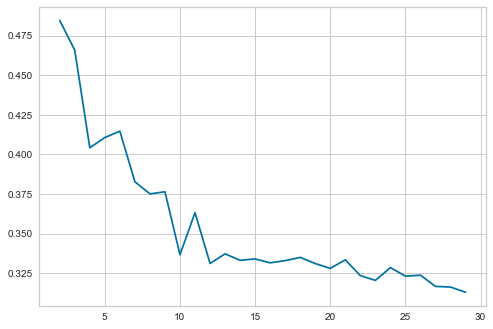

In [67]:
#Calculating the silhoette score for ach of the clusters
sil_score = []
cluster_list = range(2, 30)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((numeric_df))
    score = silhouette_score(numeric_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

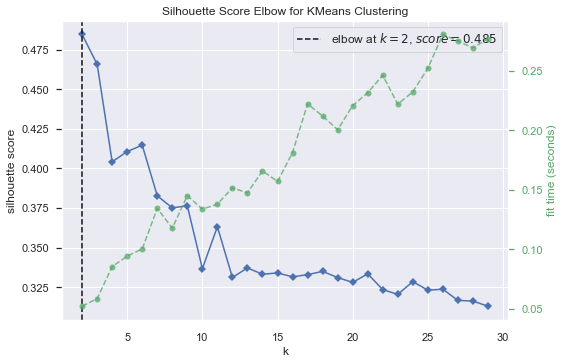

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [303]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 30), metric="silhouette", timings=True)
visualizer.fit(numeric_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

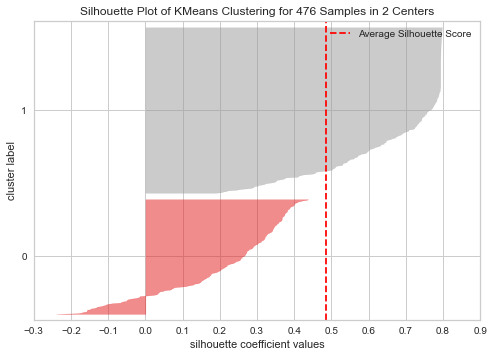

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(numeric_df)
visualizer.show()

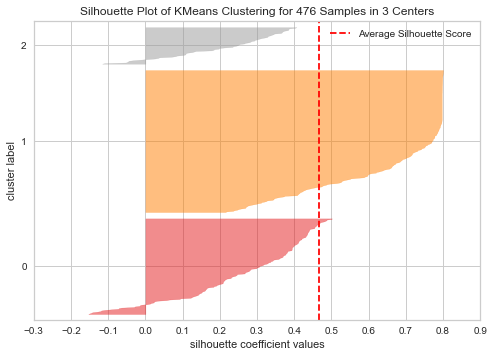

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(numeric_df)
visualizer.show()

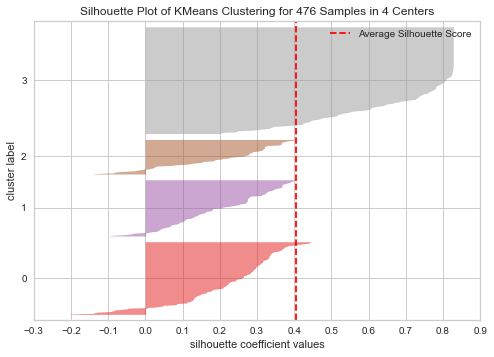

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [77]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(numeric_df)
visualizer.show()

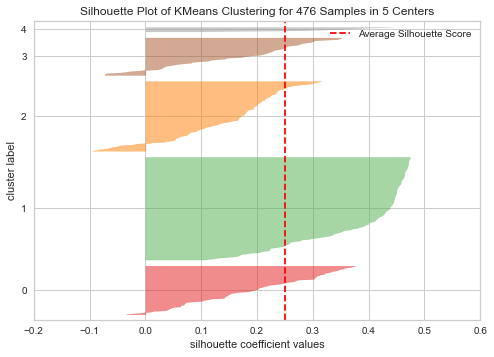

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [78]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(full_data)
visualizer.show()

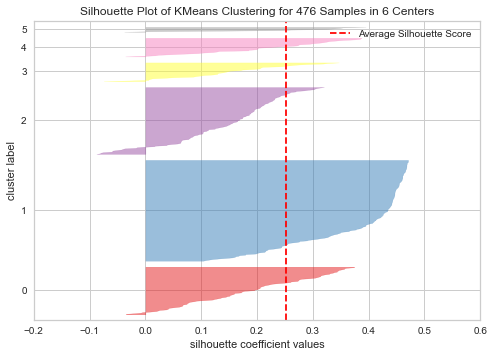

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 476 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(full_data)
visualizer.show()

We will choose 3 clusters.
Based on the elbow method, there was a knick at k=3 and the avergae silhoette score is high. In addition the distribution of the data among the curves is fairly even. 


In [80]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(numeric_df)

KMeans(n_clusters=3, random_state=1)

### Cluster Profiles

In [81]:
df1 = data.copy()

# adding kmeans cluster labels to the original and scaled dataframes
numeric_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [82]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [83]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Player_Name"].count().values
)

In [84]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,count_in_each_segment
KM_segments,,,,,,,,,,,
0,1.620482,1.849398,87.102410,2216.674699,31.710843,246.007831,471.510843,237.042169,6.048193,8.066265,166
1,0.337398,0.390244,17.646341,449.780488,6.971545,50.710976,80.154472,55.865854,0.841463,1.304878,246
2,8.687500,6.734375,141.468750,2464.921875,33.437500,624.568750,660.143750,843.593750,16.171875,9.359375,64


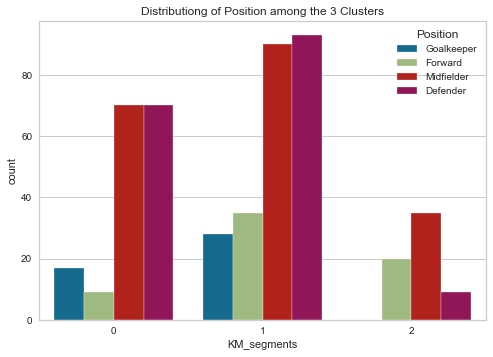

In [85]:
sns.countplot(data=df1,x='KM_segments',hue='Position')
plt.title('Distributiong of Position among the 3 Clusters')
plt.show()

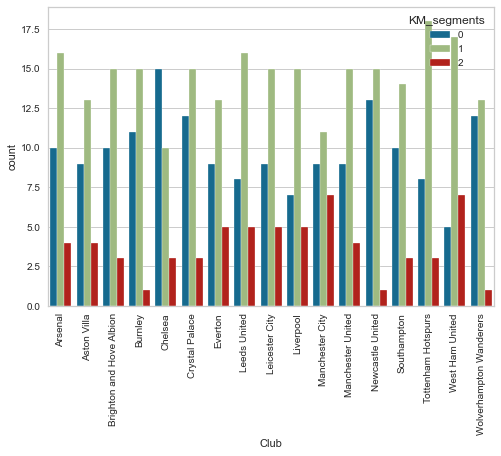

In [86]:
sns.countplot(data=df1,x='Club',hue='KM_segments')
plt.xticks(rotation=90);

In [87]:
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 1, the following players are present:
['Alex Runnarsson' 'Calum Chambers' 'Cedric Soares' 'David Luiz'
 'Edward Nketiah' 'Gabriel Teodoro Martinelli Silva' 'Martin Odegaard'
 'Matt Macey' 'Miguel Azeez' 'Mohamed Naser El Sayed Elneny' 'Pablo Mari'
 'Reiss Nelson' 'Sead Kolasinac' 'Shkodran Mustafi'
 'Sokratis Papastathopoulos' 'William Saliba' 'Ahmed El Mohamady'
 'Carney Chukwuemeka' 'Conor Hourihane' 'Henri Lansbury' 'Jacob Ramsey'
 'Jaden Philogene-Bidace' 'Jose Peleteiro Romallo' 'Keinan Davis'
 'Kortney Hause' 'Marvelous Nakamba' 'Morgan Sanson' 'Orjan Nyland'
 'Wesley Moraes' 'Aaron Connolly' 'Alexis Mac Allister'
 'Alireza Jahanbakhsh' 'Andi Zeqiri' 'Bernardo Fernandes da Silva Junior'
 'Davy Propper' 'Jakub Moder' 'Jason Steele' 'Jayson Molumby'
 'Jose Izquierdo' 'Mathew Ryan' 'Percy Tau' 'Reda Khadra' 'Steven Alzate'
 'Tariq Lamptey' 'Anthony Driscoll-Glennon' 'Bailey Peacock-Farrell'
 'Dale Stephens' 'Erik Pieters' 'Jack Cork' 'Jeff Hendrick' 'Jimmy Dunne'
 'Joel M

In [88]:
df1.groupby(["KM_segments", "Club"])['Player_Name'].count()

KM_segments  Club                    
0            Arsenal                     10
             Aston Villa                  9
             Brighton and Hove Albion    10
             Burnley                     11
             Chelsea                     15
             Crystal Palace              12
             Everton                      9
             Leeds United                 8
             Leicester City               9
             Liverpool                    7
             Manchester City              9
             Manchester United            9
             Newcastle United            13
             Southampton                 10
             Tottenham Hotspurs           8
             West Ham United              5
             Wolverhampton Wanderers     12
1            Arsenal                     16
             Aston Villa                 13
             Brighton and Hove Albion    15
             Burnley                     15
             Chelsea                  

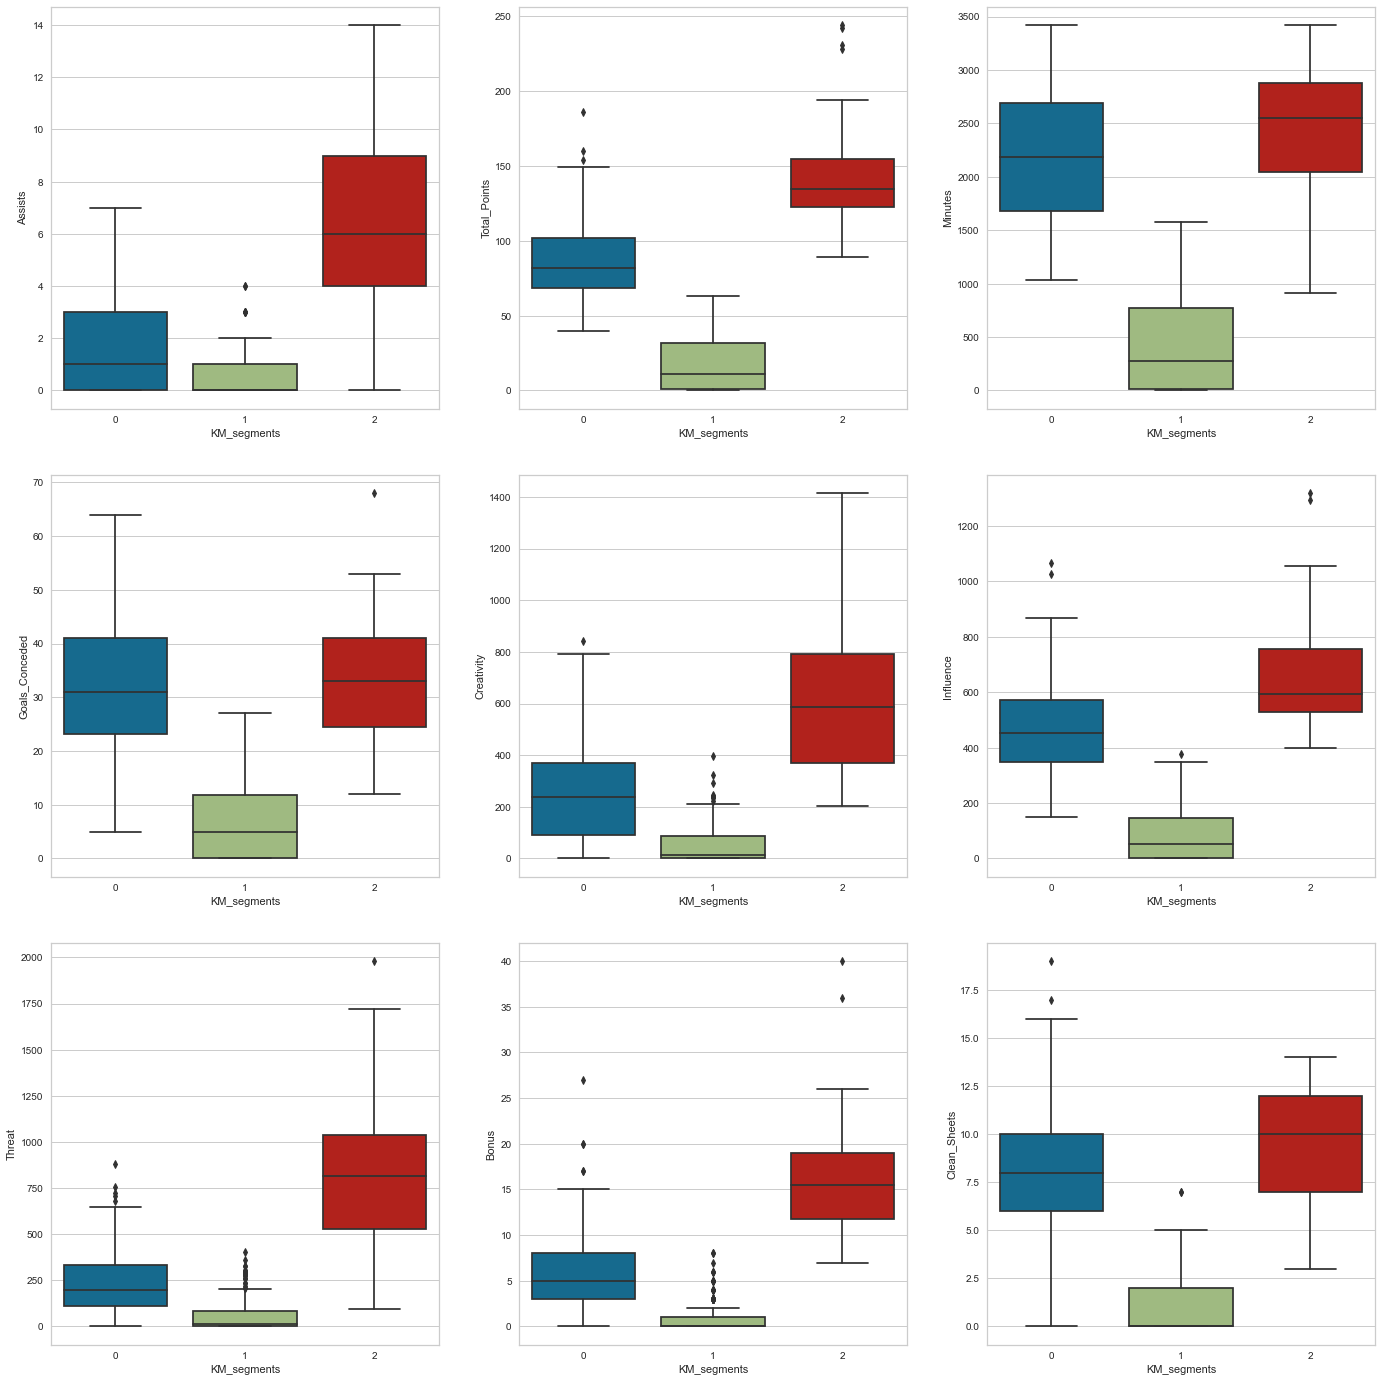

In [89]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(3):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## Insights
* Cluster 0
    * There are 146 players in this category.
    * This is most likely made up of the more average players. They score a decent amount of points, just under those in the cluster labelled 2, but more than cluster 1. 
    * This group is made up of mainly midfielders and defenders with a few forwards and goalkeepers.
    * A fantasy team with some of these players would be beneficial if the cost of adding these players was lower than the benefit of having them on the team
    
* Cluster 1
    * There are 246 total players in this cluster
    * Has the lowest average points per player.
    * Lowest values for minutes played, threat, bonus, clean sheets. 
    * Dominated by midfielders and defenders. This cluster also has most of the goalkeepers in the league. 
    * These players would only be recommended to be added to a fantasy team if 'placeholders' are necessary and if these players are 'cheap' enough.
    
* Cluster 2
    * There are 64 total players in this cluster
    * This group could be seen as the superstar players. These are the players that excel overall in the game, playing the most minutes, having the most influence, threat ect and thus having the most total points
    * Made up of mainly midfielders and forwards. There are no goalkeepers in this category.
    * Persons would want to fill their team with these players.
    

## Hierarchical Clustering

In [91]:
hc_df = full_data.copy()

In [92]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.7925800420322195.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8136813062913889.
Cophenetic correlation for Euclidean distance and average linkage is 0.7987693946144253.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.787977381596425.
Cophenetic correlation for Chebyshev distance and single linkage is 0.5636325718712354.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7753020652085135.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8317994457679795.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.7959656712720796.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.272778105185843.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.4001955208650555.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.37267536161361453.
Cophenetic cor

In [93]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="chebyshev", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "chebyshev"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.5636325718712354.
Cophenetic correlation for complete linkage is 0.7753020652085135.
Cophenetic correlation for average linkage is 0.8317994457679795.
Cophenetic correlation for weighted linkage is 0.7959656712720796.
****************************************************************************************************
Highest cophenetic correlation is 0.8317994457679795, which is obtained with average linkage.


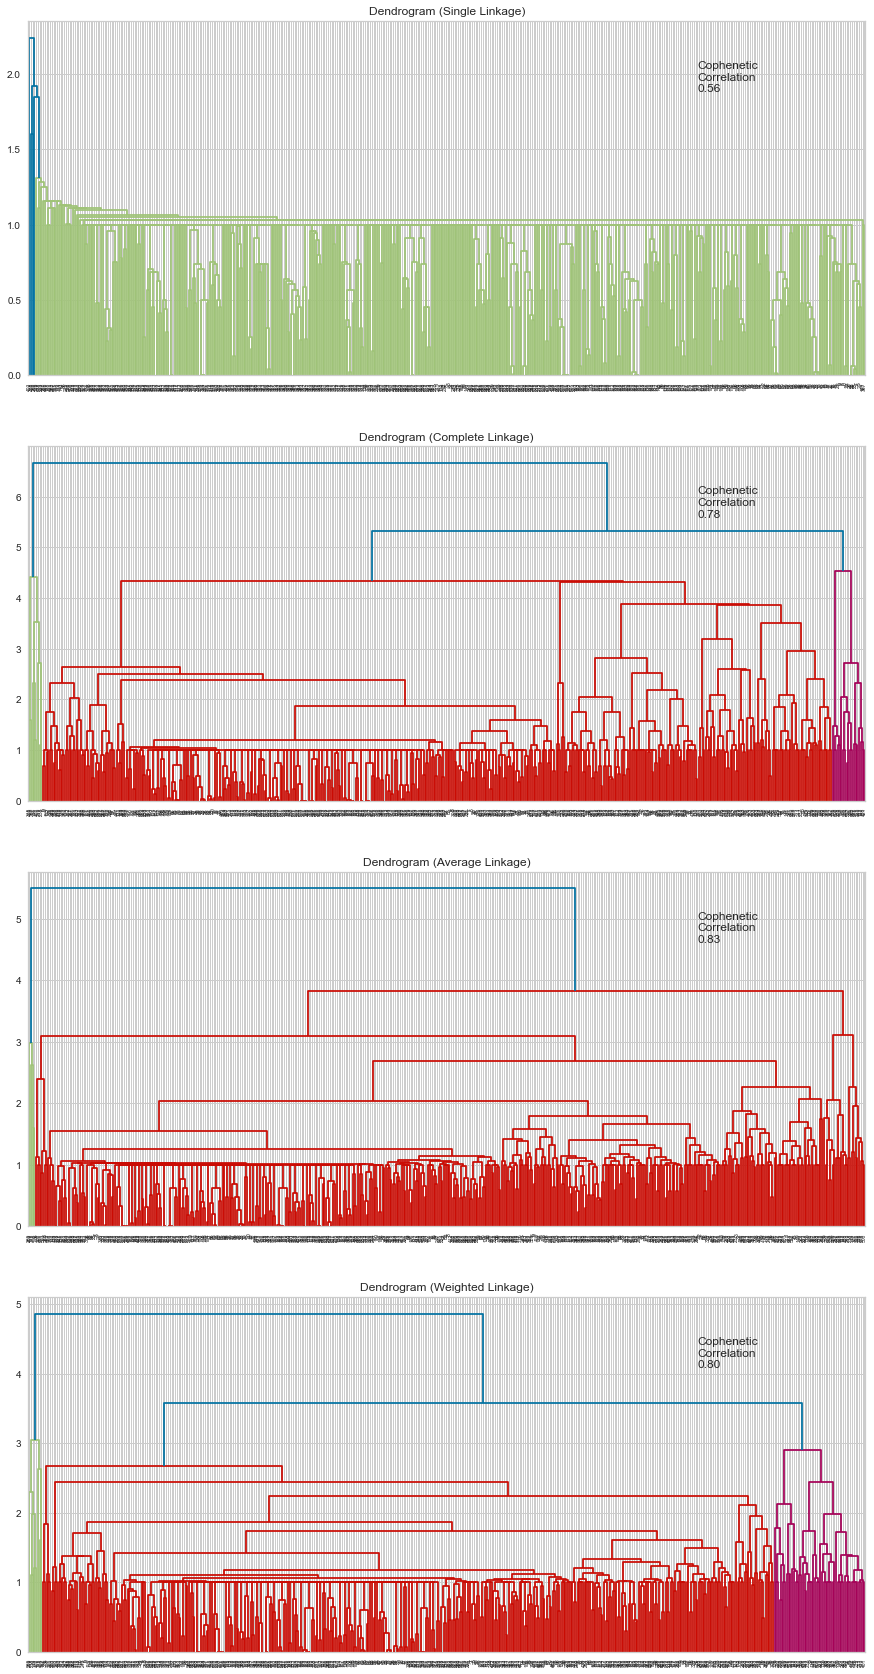

In [94]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="chebyshev", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [95]:
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.563633
1,complete,0.775302
3,weighted,0.795966
2,average,0.831799


In [96]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="chebyshev", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='chebyshev', linkage='average', n_clusters=3)

In [97]:
# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df1["HC_segments"] = HCmodel.labels_

In [98]:
hc_cluster_profile = df1.groupby("HC_segments").mean()

In [99]:
hc_cluster_profile["count_in_each_segment"] = (
    df1.groupby("HC_segments")["Player_Name"].count().values
)

In [100]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,KM_segments,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,6.916667,9.333333,148.291667,2731.291667,36.375000,804.775000,704.466667,876.916667,16.166667,10.791667,2.000000,24
1,20.000000,11.250000,236.250000,3095.000000,38.000000,987.400000,1179.750000,1466.000000,30.750000,12.250000,2.000000,4
2,1.477679,1.261161,52.120536,1246.513393,18.066964,156.295536,264.758482,178.955357,3.872768,4.354911,0.709821,448


In [101]:
# let's see the names of the companies in each cluster
for cl in df1["HC_segments"].unique():
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1["HC_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 2, the following players are present:
['Alex Runnarsson' 'Alexandre Lacazette' 'Bernd Leno' 'Bukayo Saka'
 'Calum Chambers' 'Cedric Soares' 'Daniel Ceballos' 'David Luiz'
 'Edward Nketiah' 'Emile Smith Rowe' 'Gabriel Maghalaes'
 'Gabriel Teodoro Martinelli Silva' 'Granit Xhaka' 'Hector Bellerin'
 'Kieran Tierney' 'Martin Odegaard' 'Matt Macey' 'Miguel Azeez'
 'Mohamed Naser El Sayed Elneny' 'Nicolas Pepe' 'Pablo Mari'
 'Pierre-Emerick Aubameyang' 'Reiss Nelson' 'Rob Holding' 'Sead Kolasinac'
 'Shkodran Mustafi' 'Sokratis Papastathopoulos' 'Thomas Partey'
 'William Saliba' 'Willian Borges Da Silva' 'Ahmed El Mohamady'
 'Anwar El Ghazi' 'Bertrand Traore' 'Carney Chukwuemeka' 'Conor Hourihane'
 'Douglas Luiz Soares de Paulo' 'Emiliano Martinez' 'Ezri Konsa Ngoyo'
 'Henri Lansbury' 'Jacob Ramsey' 'Jaden Philogene-Bidace' 'John McGinn'
 'Jose Peleteiro Romallo' 'Keinan Davis' 'Kortney Hause'
 'Mahmoud Ahmed Ibrahim Hassan' 'Marvelous Nakamba' 'Matt Targett'
 'Matthew Cash' 'Morga

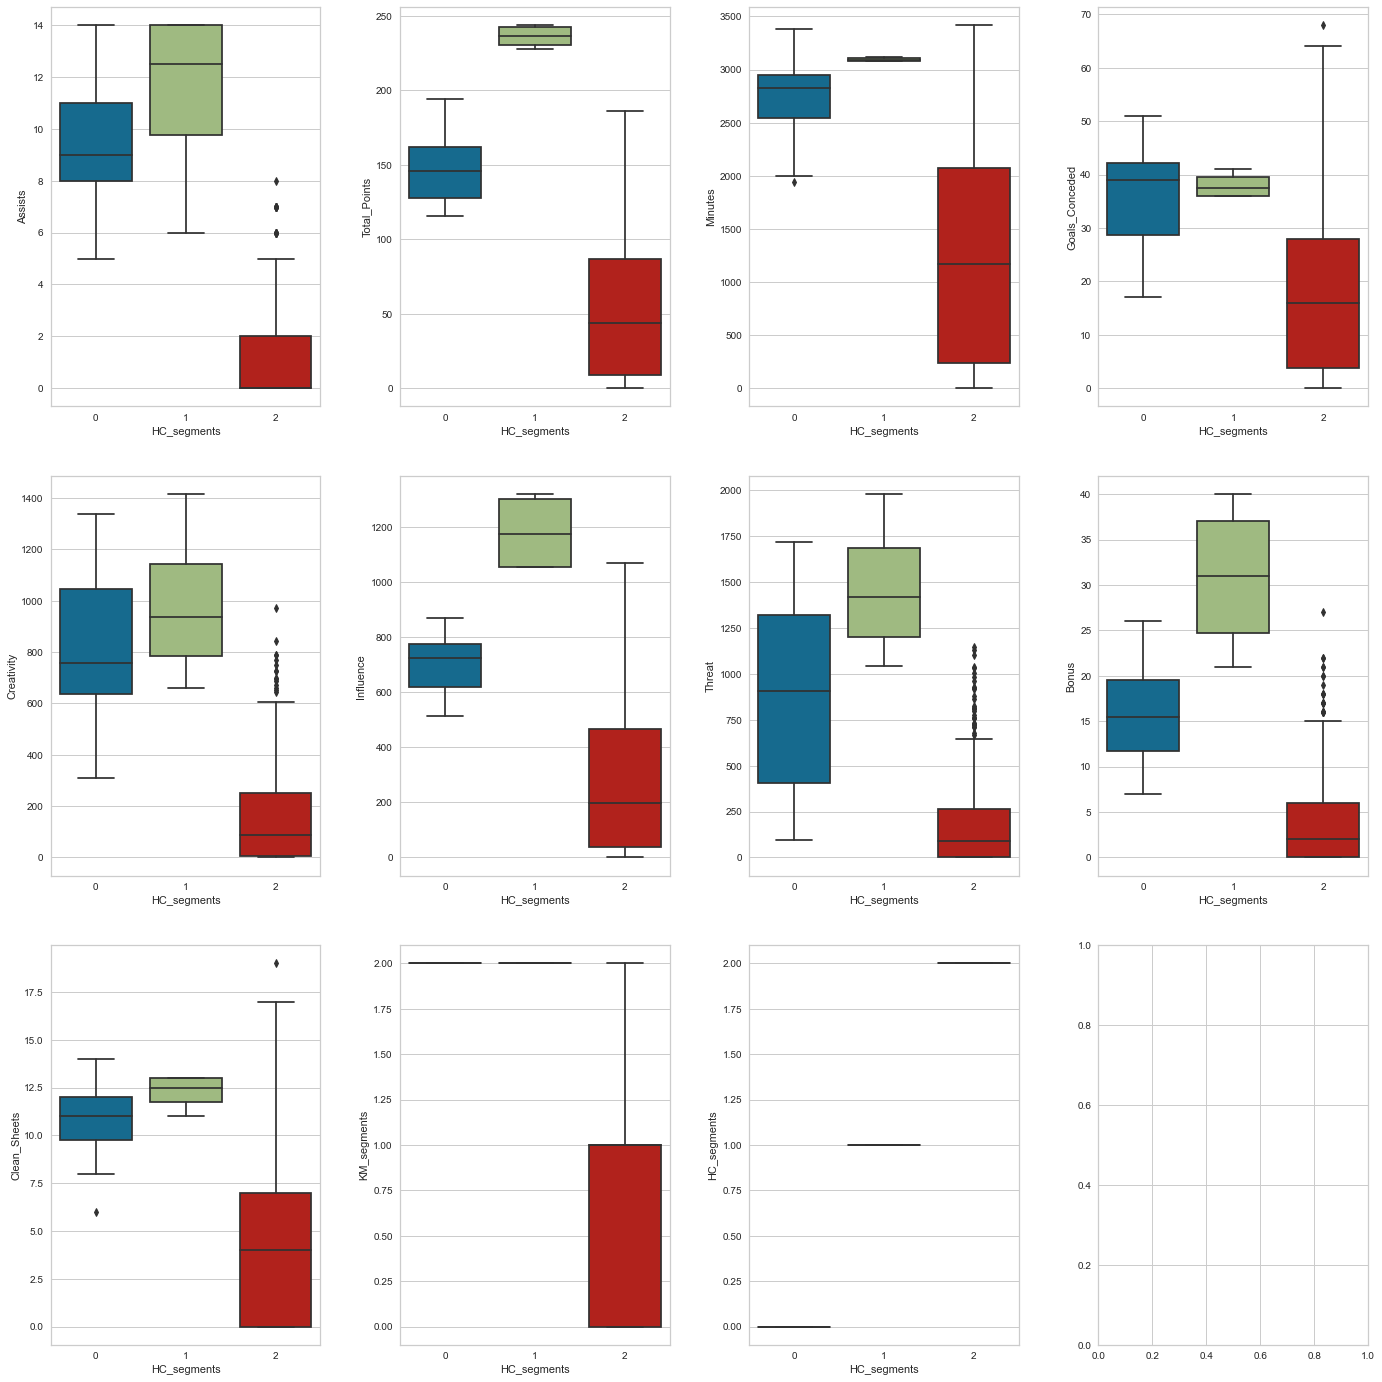

In [110]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

The hierarchal clustering created more drastic segmentations than the k-means clustering with 1 group having only 4 players, another having 448 and the last consisting of 24. Based on the number of persons in the different clusters, the K-means clustering was considered the best for this particular dataset. 

## K-means vs Hierarchical Clustering

* Both clustering techniques identified 3 clusters as the optimal groupings. 

**We will move forward with the clusters obtained using K-mean CLustering**

## Actionable Insights and Recommendations

**Cluster 0** players would represent the 'worst' player and the scores tend to be around the lowest. These players play the least on the field and therefore have the least chance of scoring points. Contains the most goalkeepers and a large number of defenders and midfielders. These players may be the first team that goes out onto the field as a 'warm up'.

**Cluster 2** players tend to be the average player with not the worst scores but also not the best scores. The mean values in this category tned to follow closely with the average values for all the players sampled. They should not perform poorly, but it would not be expected for them to provide excellent scores.
    
**Cluster 3** players are the main goal scorers and the 'stars' of their respective teams. On average players in this cluster score more than 9 goals. They play for less amount of time and concede less goals than cluster 0. No goal keepers fell in this category, likely because goal keepers do not score goals themselves.

**Recommendation**: 
Knowing the 'cost' of each player in the fantasy league would be necessary in constructing a full team. That is, the tradeoff between each player's cost and contribution can be weighed.

A cluster analysis done separately for each player position may be more fruitful in constructing a full team.